## Here I play with Pandas

In [2]:
# download libs
import numpy as np
import pandas as pd

### Task 1

Write function that can on some sequence find mean of it's members.

Do it with numpy and without it and check time.

In [0]:
# with numpy
# for time checking
%%time
# length of sequence
len_sequence = 100_000_000
outputting_value = np.array(range(len_sequence), int)
print(np.mean(outputting_value))

49999999.5
CPU times: user 14.5 s, sys: 4.26 s, total: 18.8 s
Wall time: 18.8 s


In [0]:
# without numpy
# for time checking
%%time
import statistics
len_sequence = 100_000_000
print(statistics.mean(range(len_sequence)))

49999999.5
CPU times: user 57.3 s, sys: 13.2 ms, total: 57.3 s
Wall time: 57.4 s


### Task 2

We have 2 arrays.
We need 3d array that is getting results:
    True - if elements of 1st array on even indices are 
           more then elements on 2nd array elements 
    False - everything else


In [0]:
# first array
a = np.array([7, 3, 5, 9, 2, 5, 4, 8, 9, 0])
# second array
b = np.array([2, 8, 6, 7, 1, 3, 2, 9, 5, 1])
# your code here
res = np.where(np.arange(1, len(a)+1) % 2 == 0,
                         a > b,
                         b > a)
res

array([False, False,  True,  True, False,  True, False, False, False,
       False])

### Task 3

Let's thing that we re looking at some categoris of our dataset but data have empty spaces.
Task is to implement algorithm of filling empty spaces with np.isnan() and pd.fillna()


default values:


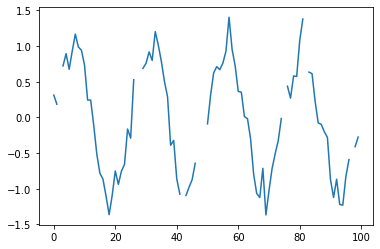

fillna with zero values:


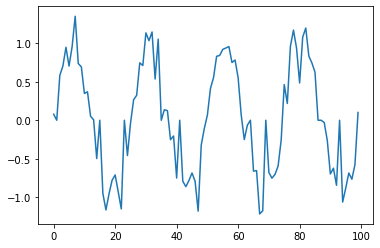

fillna with mean values:


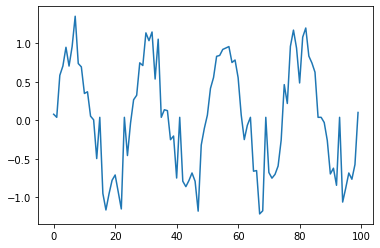

In [0]:
# library for random values
import random
# visualization
import matplotlib.pyplot as plt

# create our data and add some random noise to our dots in sin func
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# let's make some random empty spaces
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# make dataframe
df_default = pd.DataFrame({'target':a})


df_zero = df.fillna(0)
df_mean = df.fillna(df.mean())

# show results
print('default values:')
plt.plot(df_default.target.values)
plt.show()
print('fillna with zero values:')
plt.plot(df_zero.target.values)
plt.show()
print('fillna with mean values:')
plt.plot(df_mean.target.values)
plt.show()

### Task 4

We have a little dataframe in which we need to do some type of filtering and visualize the result:

* everyone who is elder then 40
* everyone who have incoming more then mean on this dataset
* everyone who have incoming more then mean by dataset but the reliability is less then mean

create new columns:

* importance of client = incoming * Reliability
* possible customer longevity = importance of client * (mean age by dataset - age of client)


In [3]:
# let's create small dataset
df = pd.DataFrame({
    'name': ['John', 'Mike', 'Ann', 'Julia'],
    'age': [45, 26, 41 , 21],
    'incoming': [100000, 80000, 150000, 60000],
    'customer reliability (0..1)': [0.65, 0.74, 0.87, 0.68],
    'sex': ['male', 'male', 'female', 'female']},
    index=[0, 1, 2, 3])


df['customer importance'] = df['incoming'] * df['customer reliability (0..1)']
df['possible customer longevity'] = df['customer importance'] * (df['age'].mean() - df['age'])

print('All who is elder than 40:\n')
print(df.loc[df['age'] > 40])

print('\nAll who is earning is more than mean:\n')
print(df.loc[df['incoming'] > df['incoming'].mean()])

print('\nAll who is earning is more than mean \
but loyalty is less than mean:\n')
print((df.loc[(df['incoming'] > df['incoming'].mean()) & (df['customer reliability (0..1)'] < df['customer reliability (0..1)'].mean())]))


# visualise dataset
df

All who is elder than 40:

   name  age  incoming  customer reliability (0..1)     sex  \
0  John   45    100000                         0.65    male   
2   Ann   41    150000                         0.87  female   

   customer importance  possible customer longevity  
0              65000.0                    -763750.0  
2             130500.0                   -1011375.0  

All who is earning is more than mean:

   name  age  incoming  customer reliability (0..1)     sex  \
0  John   45    100000                         0.65    male   
2   Ann   41    150000                         0.87  female   

   customer importance  possible customer longevity  
0              65000.0                    -763750.0  
2             130500.0                   -1011375.0  

All who is earning is more than mean but loyalty is less than mean:

   name  age  incoming  customer reliability (0..1)   sex  \
0  John   45    100000                         0.65  male   

   customer importance  possible cus

,name,age,incoming,customer reliability (0..1),sex,customer importance,possible customer longevity
0,John,45,100000,0.65,male,65000.0,-763750.0
1,Mike,26,80000,0.74,male,59200.0,429200.0
2,Ann,41,150000,0.87,female,130500.0,-1011375.0
3,Julia,21,60000,0.68,female,40800.0,499800.0
